#  O Projeto de Insights Sobre o Mercado Imobiliário

Nomes: Lucas Rezende Bruno 

### Objetivo

- O objetivo proncipal do trabalho é gerar insights sobre o mercado imobiliário através de uma análise exploratória de dados

### Contexto

- Exercendo um papel de Data Scientist, nós temos o objetivo de encontrar as melhores oportunidades de negócio no mercado de imóveis, maximizando a receita de um determinado cliente e encontrando boas oportunidade de negócio.

- A principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro do cliente que contratou o serviço de exploração de dados, e portanto maior sua receita.

- Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

<strong>A ideia desse problema, foi baseada no [link](https://medium.com/@meigarom/os-5-projetos-de-data-science-que-far%C3%A1-o-recrutador-olhar-para-voc%C3%AA-c32c67c17cc9)</strong>

### Dados

- Os dados a serem utilzados seção fornecidos através do [link](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Coluna    | Descrição
--------- | ------
<center>id</center>        | <center>Indenticação do imóvel</center>
<center>date</center>      | <center>Data de venda</center>
<center>price</center>     | <center>Preço do imóvel</center>
<center>bedrooms</center> | <center>Quantidade de quartos</center>
<center>bathrooms</center> | <center>Quantidade de manheiros</center>
<center>sqft_living</center> | <center>Área residencial em pés quadrados</center>
<center>sqft_lot</center>  | <center>Área total em pés quadrados</center>
<center>floors</center>    | <center>Quantidade de andares</center>
<center>waterfront</center> | <center>Possui vista para o mar?</center>
<center>view</center> | <center>índice de 0 a 4 para o quão bom foi a perspectiva do antigo proprietário</center>
<center>condition</center> | <center>Condição do imóvel (valor de 1 a 5)</center>
<center>grade</center> | <center>Nota do imóvel (valor de 1 a 13)</center>
<center>sqft_above</center> | Área em pés quadrado acima do chão (Não conta porões)
<center>sqft_basement</center> | <center>Área do porão em pés quadrados</center>
<center>yr_built</center> | <center>Ano de construção do imóvel</center>
<center>yr_renovated</center> | <center>Ano da última reforma da casa (0 se nunca tiver sido reformado)</center>
<center>zipcode</center> | <center>CEP do imóvel</center>
<center>lat</center> | <center>Latitude</center>
<center>long</center> | <center>Longitude</center>
<center>sqft_living15<center/> | <center>Área residencial considerando 15 vizinhos mais próximos</center>
<center>sqft_lot15</center> | <center>Área total do lote considerando 15 vizinhos mais próximos</center>



### Perguntas Principais



- Quais casas o cliente que está contratando o serviço deveria comprar e por qual preço de compra?
- Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
- O cliente deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

### Hipóteses sobre o comportamento do negócio

- Casas com jardins maiores são mais caras? Por quê?
- Casas com muitos quartos são mais caras? Por quê? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?
- As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?

Inicialmente, o que iremos fazer é verificar se existem valores nulos ou faltantes no código:

In [2]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Para ver as variáveis que mais influenciam umas com as outras, e assim poder ver quais variáveis tem mais correlação com o preço, iremos fazer uma matriz de correlação utilizando um mapa de calor:

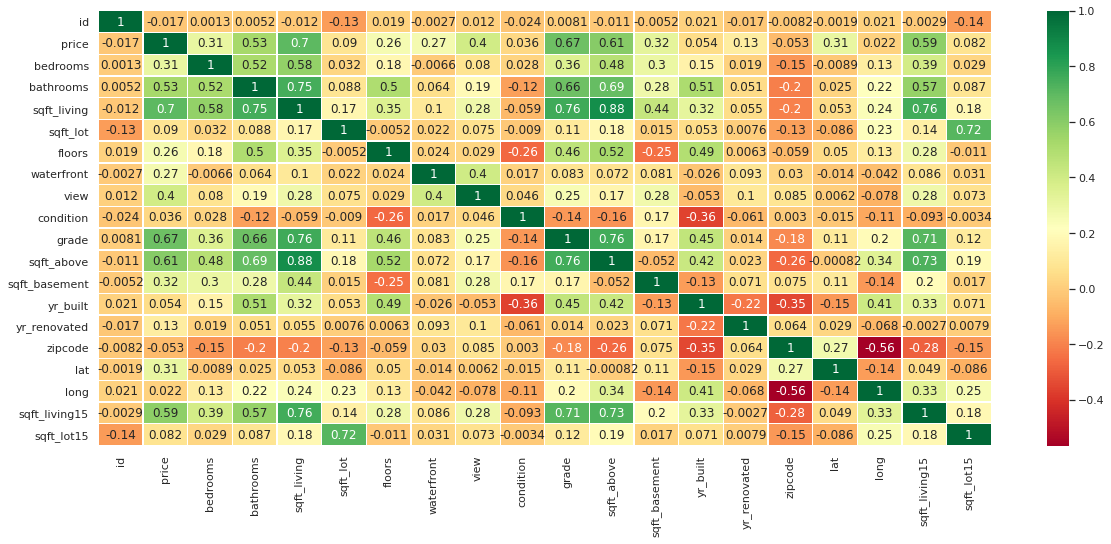

In [3]:
df = df.drop('date', axis=1)
np.random.seed(0)
sns.set_theme()
fig, ax = plt.subplots(figsize = (20, 8))
sns.heatmap(df.corr(), cmap ='RdYlGn', linewidths = 0.3, annot = True)

### Casas com jardins maiores são mais caras? Por quê?
Para resolver isso, vamos criar uma coluna com o valor da área de fora da casa diminuindo o valor do lote total com o valor do interior da casa, adicioná-la nos dados e agrupar os valores das residências de acordo com esse valor do lote:

In [4]:
sqft_out = []
for index, row in df.iterrows():
  sqft_out.append(row["sqft_lot"] - row["sqft_living"])
df["sqft_out"] = sqft_out
df["sqft_out"]

0        4470.0
1        4672.0
2        9230.0
3        3040.0
4        6400.0
          ...  
21608    -399.0
21609    3503.0
21610     330.0
21611     788.0
21612      56.0
Name: sqft_out, Length: 21613, dtype: float64

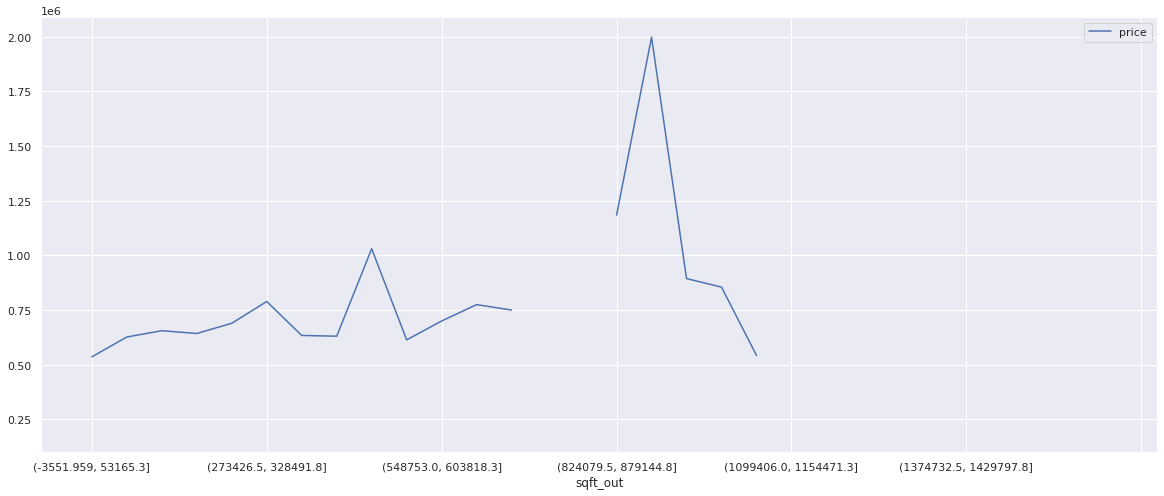

In [5]:
dados_agrupado_out = df.groupby(pd.cut(df["sqft_out"], 30)).agg({"price" : "mean"})
dados_agrupado_out.plot(kind = 'line', figsize=(20,8))


Separando as áreas de fora da casa em 30 faixas, podemos ver que o preço não parece ter sofrido grande modificação à partir dessa área. Vamos analisar outros fatores, como a área de dentro das casas:

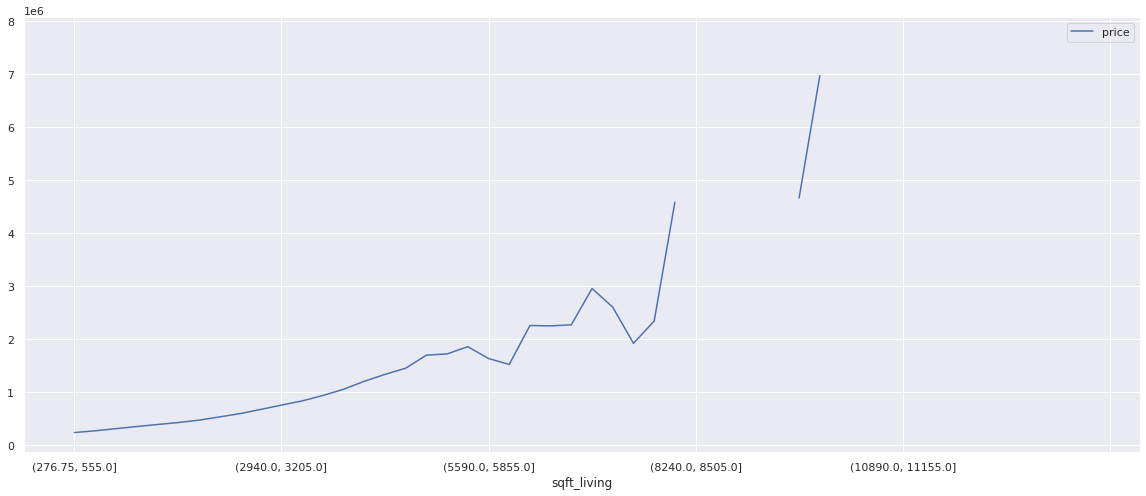

In [6]:
dados_agrupado_in = df.groupby(pd.cut(df["sqft_living"], 50)).agg({"price" : "mean"})
dados_agrupado_in.plot(kind = 'line', figsize=(20,8))

Vemos que os valores aumentam conforme se aumenta a área residencial, apesar de alguns outliers atrapalharem um pouco essa afirmação.

### Casas com muitos quartos são mais caras? Por quê? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?
Vamos agrupar os valores pela quantidade de quartos para saber o quanto isso influencia:

In [7]:
df.groupby(["bedrooms"]).agg({"price" : "count"})


,price
bedrooms,
0,13
1,199
2,2760
3,9824
4,6882
5,1601
6,272
7,38
8,13


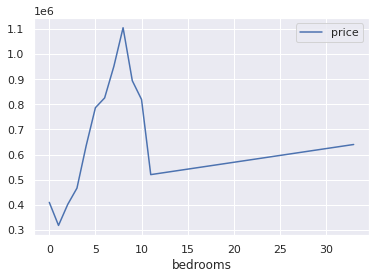

In [8]:
dados_quartos = df.groupby(["bedrooms"]).agg({"price" : "mean"})
dados_quartos.plot()

Parece que casas com nenhum quarto não necessariamente significam casas mais baratas, pois podem significar que são casas não residenciais com outras funcionalidades que agregam nesse preço. Porém, o preço cresce progressivamente com o aumento do número de quartos desde um quarto só. A diferença das médias não seguem um padrão de aumento, com algumas diferenças sendo maiores que outras. Por exemplo, de 5 para 6 quartos o aumento é de cerca de 38920 dólares, enquanto a diferença de preço de 7 para 8 quartos é de cerca de 153892 dólares.

Entretanto, pode haver outliers que estejam causando isso. Para verificar isso, vamos fazer uma visualização de boxplot para verificar a distribuição dos dados para os quartos:

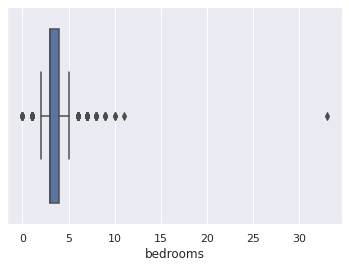

In [9]:
sns.boxplot(data= df, x='bedrooms')

Podemos ver como tem bastantes outliers, e por esse motivo não é possível simplesmente confiar totalmente nesta variável como algo para determinar o preço da casa.

### As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?

Para checar isso, vamos fazer uma visualização dos valores de preço de acordo com a latitude e longitude:

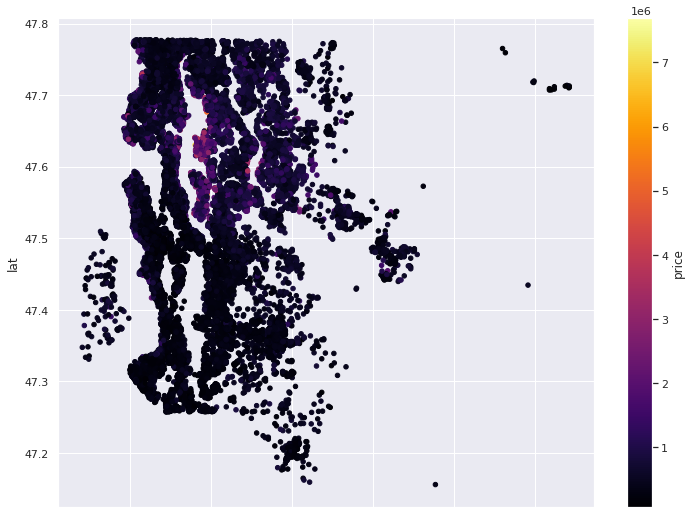

In [10]:
ax=df.plot(kind="scatter",x='long',y='lat',figsize=(12,9),c="price",cmap=plt.get_cmap("inferno"))

In [11]:
ordenados_por_preco = df.sort_values(by='price', ascending=False)
ordenados_por_preco.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_out
7252,6762700020,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,15550.0
3914,9808700762,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,27285.0
9254,9208900037,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,21484.0
4411,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,25869.0
1448,8907500070,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,15985.0


Checando a região onde estão os preços mais caros, verificamos que as casas mais perto da água são mais caras.

Abaixo podemos ver que o mapa de calor acima corresponde bem a esta área no mapa de Seattle, e que as casas mais caras estão circundando o lago de Washington.

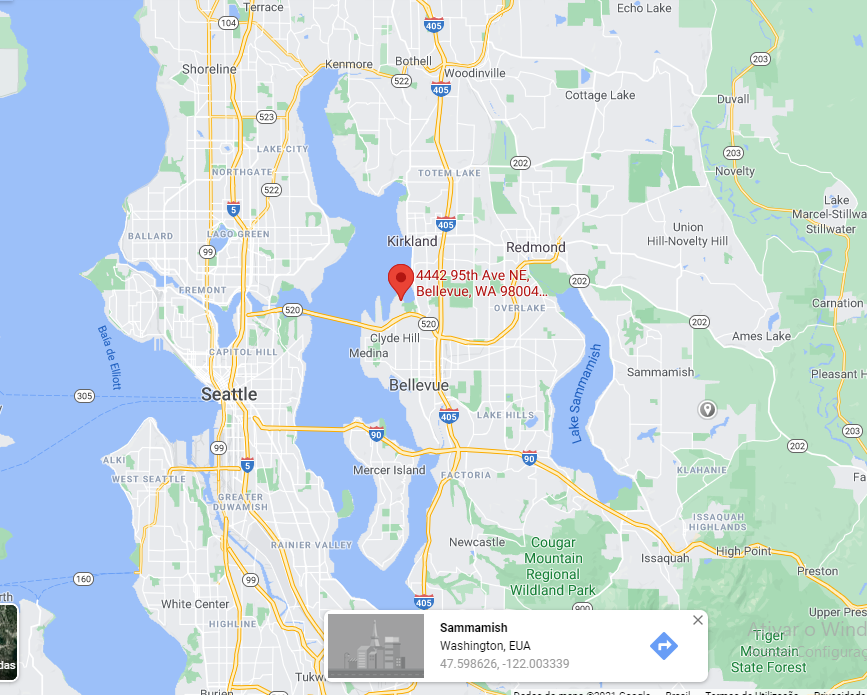

Com todas essas informações, a gente percebeu quais variáveis numéricas mais influenciam no preço dos imóveis: tamanho de dentro da residência e latitude. Além deles, através da matriz de correlação, podemos ver algumas outras coluans que merecem ser mantidas para o modelo que será montado mais pra frente.

Agora precisamos determinar quais variáveis categóricas podem influenciar também no preço dos imóveis:

In [12]:
df['waterfront'] = df['waterfront'].astype('object')
df['view'] = df['view'].astype('object')
df['condition'] = df['condition'].astype('object')
df['grade'] = df['grade'].astype('object')
df['zipcode'] = df['zipcode'].astype('object')
df_categorica = df.select_dtypes('object')

waterfront Vs price


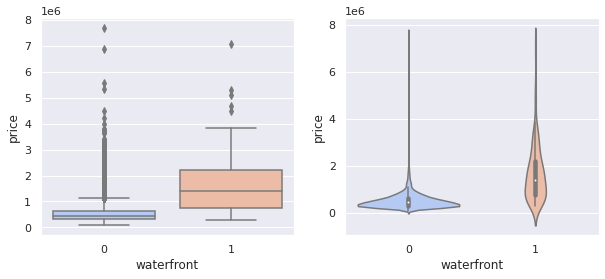

view Vs price


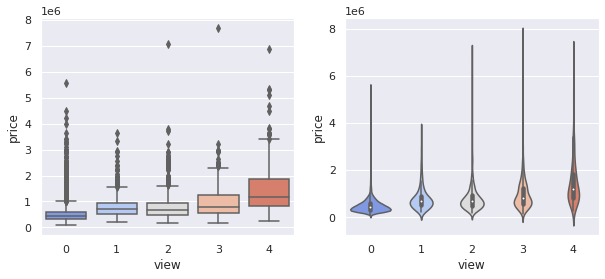

condition Vs price


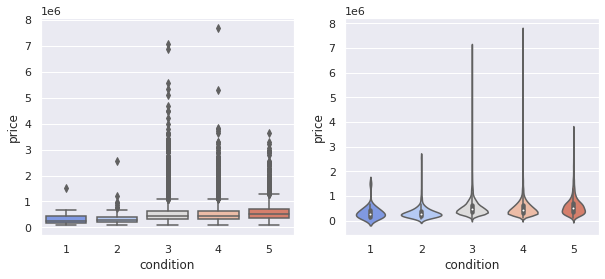

grade Vs price


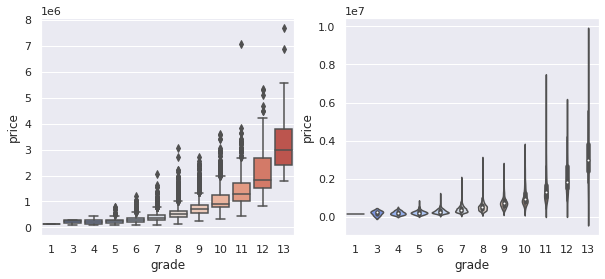

In [13]:
plt.rcParams['figure.figsize']= 10,4
for col in df_categorica:
    if col != 'zipcode':
      fig,ax= plt.subplots(1,2)
      print(col,'Vs price')
      sns.boxplot(x = df_categorica[col],y = df['price'],ax=ax[0],palette='coolwarm')
      sns.violinplot(x = df_categorica[col],y = df['price'],ax=ax[1],palette='coolwarm')
      plt.show()

Podemos perceber que todos esses valores podem contribuir para determinar o preço no modelo. Para podemos determinar ainda mais a qualidade destas colunas, podemos utilizar o teste de kruskal para avaliar a correlação com o preço:

In [14]:
import scipy.stats as st


In [15]:
for col in df_categorica:
  print(col)
  print(st.kruskal(df['price'], df_categorica[col]))
  print('\n')

waterfront
KruskalResult(statistic=36931.57923049245, pvalue=0.0)


view
KruskalResult(statistic=35690.298593513806, pvalue=0.0)


condition
KruskalResult(statistic=33647.91461692104, pvalue=0.0)


grade
KruskalResult(statistic=32815.20996215734, pvalue=0.0)


zipcode
KruskalResult(statistic=32276.314426134624, pvalue=0.0)




Através desse resultado, podemos concluir que todas essas categorias afetam na coluna de preço.

Agora, iremos montar um modelo com as colunas selecionadas e comparar alguns algoritmos de aprendizado de máquina para ver quais deles terão a melhor perfomance predizendo o preço dos imóveis:

In [16]:
df = df.drop(['id','sqft_lot','sqft_lot15','yr_renovated','long'],axis=1) #removendo colunas que nao obtiveram um bom valor de correlacao
X = df.drop('price',axis=1)
y = df['price']

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in X.select_dtypes(np.number):
    X[i] = pt.fit_transform(X[[i]])

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.select_dtypes('object'):
    X[i] = le.fit_transform(X[[i]])

In [19]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,train_size=0.5,random_state=42)
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((10806, 15), (10807, 15), (10806,), (10807,))

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in x_treino.columns:
    x_treino[i] = sc.fit_transform(x_treino[[i]])
for i in x_teste.columns:
    x_teste[i] = sc.fit_transform(x_teste[[i]])

In [21]:
from sklearn.metrics import adjusted_rand_score, r2_score, mean_squared_error, mean_absolute_error

In [22]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2577.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:02:42   Log-Likelihood:            -2.9652e+05
No. Observations:               21613   AIC:                         5.931e+05
Df Residuals:                   21597   BIC:                         5.932e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.283e+05   1.44e+04    -22.780      0.000   -3.57e+05      -3e+05
bedrooms      -1.967e+04   2045.779     -9.617      0.000   -2.37e+04   -1.57e+04
bathrooms       4.79e+04   2763.529     17.331      0.000    4.25e+04    5.33e+04
sqft_living    7.548e+04   6925.871     10.898      0.000    6.19e+04    8.91e+04
floors         1.444e+04   2219.291      6.508      0.000    1.01e+04    1.88e+04
waterfront     6.147e+05   1.89e+04     32.478      0.000    5.78e+05    6.52e+05
view           6.303e+04   2301.862     27.382      0.000    5.85e+04    6.75e+04
condition      1.966e+04   2547.705      7.717      0.000    1.47e+04    2.47e+04
grade           1.48e+05   2215.218     66.806      0.000    1.44e+05    1.52e+05
sqft_above    -3564.9365   6687.599     -0.533      0.594   -1.67e+04    9543.251
sqft_basement    15.3707   3304.306      0.005      0.996   -6461.313    6492.055
yr_built      -9.994e+04   2210.878    -45.203      0.000   -1.04e+05   -9.56e+04
zipcode       -1012.4352     90.635    -11.171      0.000   -1190.086    -834.785
lat            7.344e+04   1612.743     45.536      0.000    7.03e+04    7.66e+04
sqft_living15  1.083e+04   2432.173      4.454      0.000    6065.635    1.56e+04
sqft_out      -5448.5686   1623.742     -3.356      0.001   -8631.222   -2265.915
==============================================================================
Omnibus:                    21569.558   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3702834.190
Skew:                           4.502   Prob(JB):                         0.00
Kurtosis:                      66.488   Cond. No.                         512.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
x_treino = x_treino.drop(['sqft_above','sqft_basement'],axis=1)
x_teste = x_teste.drop(['sqft_above','sqft_basement'],axis=1)

Com os modelos prontos, podemos executar alguns algoritmos de aprendizado de máquina para verificar qual irá se adaptar melhor ao modelo:

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(x_treino,y_treino)
ypred = lr.predict(x_teste)
print('Linear Regression - Score de treino: ',lr.score(x_treino,y_treino))
print('Linear Regression - Score de teste: ',lr.score(x_teste,y_teste))

Linear Regression - Score de treino:  0.6618684991399069
Linear Regression - Score de teste:  0.6224833586457109


In [25]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10,min_samples_split=15,max_leaf_nodes=50, random_state=42)
dt = dt.fit(x_treino,y_treino)
ypred_dt = lr.predict(x_teste)
print('Decision Tree - Score de treino: ', dt.score(x_treino,y_treino))
print('Decision Tree - Score de teste: ', dt.score(x_teste,y_teste))

Decision Tree - Score de treino:  0.8112073264520016
Decision Tree - Score de teste:  0.7236776951644943


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150,max_depth=7)
rf = rf.fit(x_treino,y_treino)
ypred_rf = rf.predict(x_teste)
print('Random Forest - Score de treino: ',rf.score(x_treino,y_treino))
print('Random Forest - Score de teste: ',rf.score(x_teste,y_teste))

Random Forest - Score de treino:  0.8596470869816754
Random Forest - Score de teste:  0.7769656762147817


In [27]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators=10,random_state=42)
adb = adb.fit(x_treino,y_treino)
ypred_adb = adb.predict(x_teste)
print('Ada Boost - Score de treino: ', adb.score(x_treino,y_treino))
print('Ada Boost - Score de teste: ',adb.score(x_teste,y_teste))

Ada Boost - Score de treino:  0.683487323404364
Ada Boost - Score de teste:  0.6503779933534627


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb = gb.fit(x_treino,y_treino)
ypred_gb = gb.predict(x_teste)
print('Gradient Boost - Score de treino: ',gb.score(x_treino,y_treino))
print('Gradient Boost - Score de teste: ',gb.score(x_teste,y_teste))

Gradient Boost - Score de treino:  0.8912320825302803
Gradient Boost - Score de teste:  0.8359234207199133


In [29]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=8,random_state=42)
xgb = xgb.fit(x_treino,y_treino)
ypred_xgb = xgb.predict(x_teste)
print('XGB - Score de treino: ',xgb.score(x_treino,y_treino))
print('XGB - Score de treino: ',xgb.score(x_teste,y_teste))

[16:02:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB - Score de treino:  0.10707592152245915
XGB - Score de treino:  0.1147429188633674


In [30]:
score_por_algoritmo = pd.DataFrame({'Algoritmo': ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],'Score' : [lr.score(x_teste,y_teste), dt.score(x_teste,y_teste), rf.score(x_teste,y_teste), adb.score(x_teste,y_teste), gb.score(x_teste,y_teste), xgb.score(x_teste,y_teste)]})
score_por_algoritmo


,Algoritmo,Score
0,Regressão Linear,0.622483
1,Árvore de Decisão,0.723678
2,Random Forest,0.776966
3,Ada Boost,0.650378
4,Gradient Boost,0.835923
5,XGBoost,0.114743


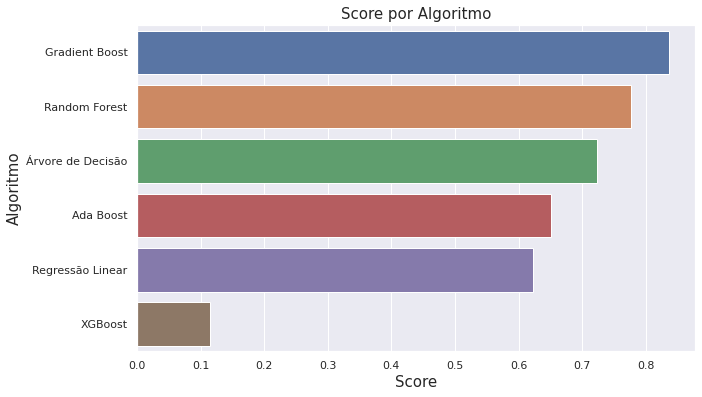

In [31]:
score_por_algoritmo.sort_values(by='Score', ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = 10,6
sns.barplot(x = 'Score', y = 'Algoritmo', data = score_por_algoritmo)

plt.title('Score por Algoritmo', fontsize = 15)
plt.xlabel('Score', fontsize = 15)
plt.ylabel('Algoritmo', fontsize = 15)
plt.show()

Comparando os scores, o que teve o maior resultado foi o Gradient Boost. Iremos ver agora os valores de importância pra cada uma das colunas para determinar quais tiveram mais relevância para determinar o preço dos imóveis segundo o modelo do Gradient Boost:

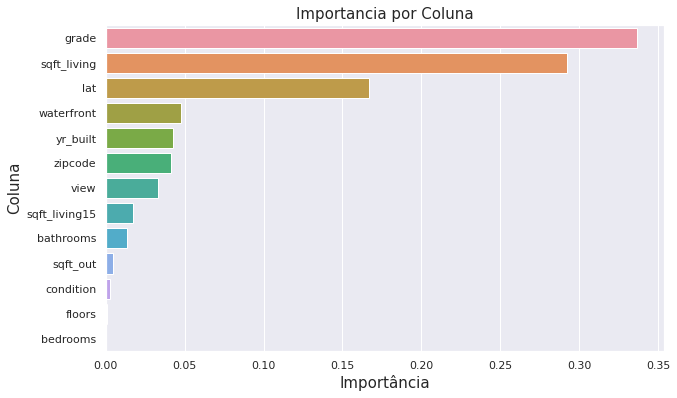

In [32]:
importancia_por_coluna = pd.DataFrame({'Coluna' : x_treino.columns, 'Importancia' : gb.feature_importances_})
importancia_por_coluna.sort_values(by='Importancia', ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = 10,6
sns.barplot(x = 'Importancia', y = 'Coluna', data = importancia_por_coluna)

plt.title('Importancia por Coluna', fontsize = 15)
plt.xlabel('Importância', fontsize = 15)
plt.ylabel('Coluna', fontsize = 15)
plt.show()

Como conclusão, podemos perceber algumas coisas:
- A nota (grade) e o tamanho de dentro do imóvel foram as colunas mais importantes, e já sabiamos disso antes analisando o comportamento do preço com as diferentes faixas de tamanho do interior dos imóveis e analisando a matriz de correlação.
- A latitude foi a terceira coluna mais influente, e isso foi percebido em nossa análise de que as casas que estavam perto do rio eram mais valiosas (portanto, com latitude parecidas)
- O ano em que a casa foi construída não segue uma linha linear (casas mais velhas são mais caras ou mais baratas que casas mais novas, e vice e versa), mas teve uma boa influência no modelo.
- A coluna view não apresentou tanta importância quanto esperado, mas teve um bom papel de importância.
- A quantidade de banheiros não teve uma importância grande pela quantidade de outliers e falta de linearidade com o preço.
- A quantidade de quartos e andares não manifestou nenhuma importância, pois eram também dados cheio de outliers e com um preço incostante.
- Foi esperado que o código postal (zipcode) tivesse uma boa relação com o modelo, já que as casas mais caras costumavam ficar bem perto. Entretanto, ele não teve qualquer relevância para determinar o preço no modelo.

# Parte 2 do Trabalho

O objetivo agora é o de tentar realizar alterações no modelo para obter resultados ainda melhores. Para começar, vamos tentar mudar a proporção dos dados de treinamento e teste e alguns valores específicos dos algoritmos:

In [33]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,train_size=0.75,random_state=48)
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((16209, 16), (5404, 16), (16209,), (5404,))

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in x_treino.columns:
    x_treino[i] = sc.fit_transform(x_treino[[i]])
for i in x_teste.columns:
    x_teste[i] = sc.fit_transform(x_teste[[i]])

In [35]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2577.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:08:33   Log-Likelihood:            -2.9652e+05
No. Observations:               21613   AIC:                         5.931e+05
Df Residuals:                   21597   BIC:                         5.932e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.283e+05   1.44e+04    -22.780      0.000   -3.57e+05      -3e+05
bedrooms      -1.967e+04   2045.779     -9.617      0.000   -2.37e+04   -1.57e+04
bathrooms       4.79e+04   2763.529     17.331      0.000    4.25e+04    5.33e+04
sqft_living    7.548e+04   6925.871     10.898      0.000    6.19e+04    8.91e+04
floors         1.444e+04   2219.291      6.508      0.000    1.01e+04    1.88e+04
waterfront     6.147e+05   1.89e+04     32.478      0.000    5.78e+05    6.52e+05
view           6.303e+04   2301.862     27.382      0.000    5.85e+04    6.75e+04
condition      1.966e+04   2547.705      7.717      0.000    1.47e+04    2.47e+04
grade           1.48e+05   2215.218     66.806      0.000    1.44e+05    1.52e+05
sqft_above    -3564.9365   6687.599     -0.533      0.594   -1.67e+04    9543.251
sqft_basement    15.3707   3304.306      0.005      0.996   -6461.313    6492.055
yr_built      -9.994e+04   2210.878    -45.203      0.000   -1.04e+05   -9.56e+04
zipcode       -1012.4352     90.635    -11.171      0.000   -1190.086    -834.785
lat            7.344e+04   1612.743     45.536      0.000    7.03e+04    7.66e+04
sqft_living15  1.083e+04   2432.173      4.454      0.000    6065.635    1.56e+04
sqft_out      -5448.5686   1623.742     -3.356      0.001   -8631.222   -2265.915
==============================================================================
Omnibus:                    21569.558   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3702834.190
Skew:                           4.502   Prob(JB):                         0.00
Kurtosis:                      66.488   Cond. No.                         512.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_treino = x_treino.drop(['sqft_above','sqft_basement'],axis=1)
x_teste = x_teste.drop(['sqft_above','sqft_basement'],axis=1)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(x_treino,y_treino)
ypred = lr.predict(x_teste)
print('Linear Regression - Score de treino: ',lr.score(x_treino,y_treino))
print('Linear Regression - Score de teste: ',lr.score(x_teste,y_teste))

Linear Regression - Score de treino:  0.6401342831293322
Linear Regression - Score de teste:  0.6445687370467398


In [59]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=30,min_samples_split=30,max_leaf_nodes=100, random_state=48)
dt = dt.fit(x_treino,y_treino)
ypred_dt = lr.predict(x_teste)
print('Decision Tree - Score de treino: ', dt.score(x_treino,y_treino))
print('Decision Tree - Score de teste: ', dt.score(x_teste,y_teste))

Decision Tree - Score de treino:  0.8334833901555215
Decision Tree - Score de teste:  0.7522224506687978


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000,max_depth=15)
rf = rf.fit(x_treino,y_treino)
ypred_rf = rf.predict(x_teste)
print('Random Forest - Score de treino: ',rf.score(x_treino,y_treino))
print('Random Forest - Score de teste: ',rf.score(x_teste,y_teste))

Random Forest - Score de treino:  0.9698044015835058
Random Forest - Score de teste:  0.86621738923139


In [49]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators=8,random_state=48)
adb = adb.fit(x_treino,y_treino)
ypred_adb = adb.predict(x_teste)
print('Ada Boost - Score de treino: ', adb.score(x_treino,y_treino))
print('Ada Boost - Score de teste: ',adb.score(x_teste,y_teste))

Ada Boost - Score de treino:  0.6882775420638442
Ada Boost - Score de teste:  0.6456628949982424


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=48)
gb = gb.fit(x_treino,y_treino)
ypred_gb = gb.predict(x_teste)
print('Gradient Boost - Score de treino: ',gb.score(x_treino,y_treino))
print('Gradient Boost - Score de teste: ',gb.score(x_teste,y_teste))

Gradient Boost - Score de treino:  0.8936756334689663
Gradient Boost - Score de teste:  0.847230180786327


In [78]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=5000,random_state=1)
xgb = xgb.fit(x_treino,y_treino)
ypred_xgb = xgb.predict(x_teste)
print('XGB - Score de treino: ',xgb.score(x_treino,y_treino))
print('XGB - Score de treino: ',xgb.score(x_teste,y_teste))

[17:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB - Score de treino:  0.9800852324765419
XGB - Score de treino:  0.885462327510669


In [79]:
score_por_algoritmo = pd.DataFrame({'Algoritmo': ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],'Score' : [lr.score(x_teste,y_teste), dt.score(x_teste,y_teste), rf.score(x_teste,y_teste), adb.score(x_teste,y_teste), gb.score(x_teste,y_teste), xgb.score(x_teste,y_teste)]})
score_por_algoritmo


,Algoritmo,Score
0,Regressão Linear,0.644569
1,Árvore de Decisão,0.752222
2,Random Forest,0.866217
3,Ada Boost,0.645663
4,Gradient Boost,0.847230
5,XGBoost,0.885462


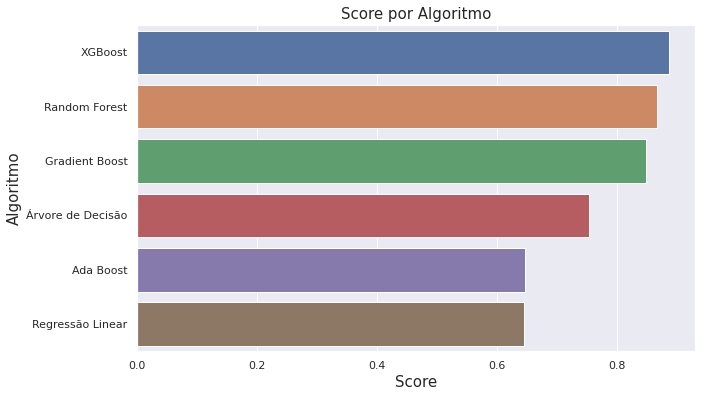

In [80]:
score_por_algoritmo.sort_values(by='Score', ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = 10,6
sns.barplot(x = 'Score', y = 'Algoritmo', data = score_por_algoritmo)

plt.title('Score por Algoritmo', fontsize = 15)
plt.xlabel('Score', fontsize = 15)
plt.ylabel('Algoritmo', fontsize = 15)
plt.show()

Além de aumentar o número da eficácia do melhor algoritmo, a calibragem dos parâmetros também mudou totalmente a ordem dos melhores algoritmos, com o XGBoost, que tinha sido o pior antes, sendo o melhor algoritmo desta vez, com um score de 0.885462.

Vamos tentar executar outros algoritmos agora:

In [88]:
from sklearn import linear_model
reg = linear_model.BayesianRidge(n_iter=1500)
reg = reg.fit(x_treino,y_treino)
ypred_reg = reg.predict(x_teste)
print('Bayesian Ridge - Score de treino: ',reg.score(x_treino,y_treino))
print('Bayesian Ridge - Score de teste ',reg.score(x_teste,y_teste))

Bayesian Ridge - Score de treino:  0.640133939358668
Bayesian Ridge - Score de teste  0.6445684517422747


In [73]:
from sklearn import svm
reg_svm = svm.SVR(kernel='linear')
reg_svm = reg_svm.fit(x_treino, y_treino)
ypred_reg_svm = reg_svm.predict(x_teste)
print('SVM - Score de treino: ',reg_svm.score(x_treino,y_treino))
print('SVM - Score de teste ',reg_svm.score(x_teste,y_teste))

SVM - Score de treino:  0.06056175198882352
SVM - Score de teste  0.05213938747130164


In [77]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1500).fit(x_treino, y_treino)
ypred_regr= regr.predict(x_teste)
print('MLPRegressor - Score de treino: ',regr.score(x_treino,y_treino))
print('MLPRegressor - Score de teste ',regr.score(x_teste,y_teste))

MLPRegressor - Score de treino:  0.6784342091974269
MLPRegressor - Score de teste  0.6763860208618468


In [84]:
from sklearn.linear_model import TheilSenRegressor
reg_theil = TheilSenRegressor(random_state=5, max_iter=1500).fit(x_treino, y_treino)
ypred_reg_theil = reg_theil.predict(x_teste)
print('TheilSenRegressor - Score de treino: ',reg_theil.score(x_treino,y_treino))
print('TheilSenRegressor - Score de teste ',reg_theil.score(x_teste,y_teste))

TheilSenRegressor - Score de treino:  0.4786907486597264
TheilSenRegressor - Score de teste  0.49709607680209233


Abaixo podemos ver os valores de score contendo os novos algoritmos utilizados:

In [89]:
score_por_algoritmo = pd.DataFrame({'Algoritmo': ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost', 'Bayesian Ridge','SVM','MLP Regressor','Theil-Sen Regressor'],'Score' : [lr.score(x_teste,y_teste), dt.score(x_teste,y_teste), rf.score(x_teste,y_teste), adb.score(x_teste,y_teste), gb.score(x_teste,y_teste), xgb.score(x_teste,y_teste), reg.score(x_teste,y_teste), reg_svm.score(x_teste,y_teste), regr.score(x_teste,y_teste), reg_theil.score(x_teste,y_teste)]})


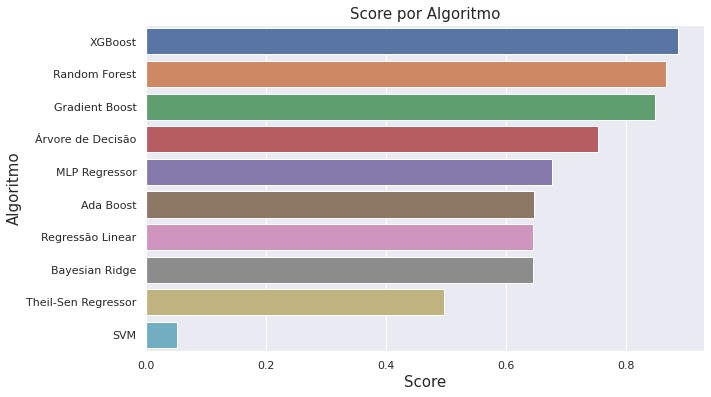

In [90]:
score_por_algoritmo.sort_values(by='Score', ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = 10,6
sns.barplot(x = 'Score', y = 'Algoritmo', data = score_por_algoritmo)

plt.title('Score por Algoritmo', fontsize = 15)
plt.xlabel('Score', fontsize = 15)
plt.ylabel('Algoritmo', fontsize = 15)
plt.show()

Mesmo alternando diversos atributos dos algoritmos acima, nenhum deles chegou perto do maior valor obtido anteriormente pelo XGBoost, portanto podem ser descartados.

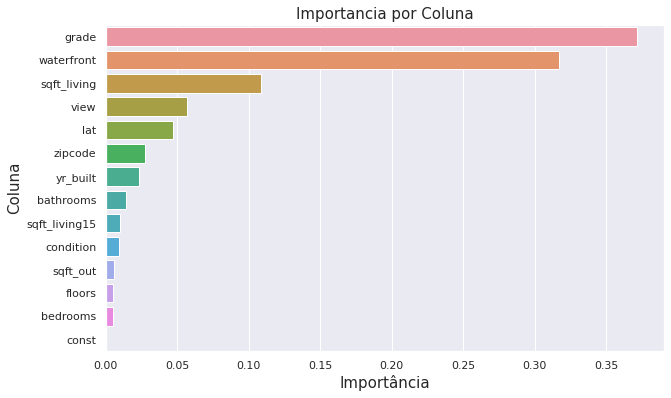

In [81]:
importancia_por_coluna = pd.DataFrame({'Coluna' : x_treino.columns, 'Importancia' : xgb.feature_importances_})
importancia_por_coluna.sort_values(by='Importancia', ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = 10,6
sns.barplot(x = 'Importancia', y = 'Coluna', data = importancia_por_coluna)

plt.title('Importancia por Coluna', fontsize = 15)
plt.xlabel('Importância', fontsize = 15)
plt.ylabel('Coluna', fontsize = 15)
plt.show()

Com a mudança dos parâmetros, a importância das colunas também mudou completamente.

#Conclusão

- O aumento do número de iterações e da complexidade dos algoritmos já executados na etapa 1 melhorou a perfomance deles, ao custo de um tempo maior de execução do código;
- O algoritmo XGBoost calibrado da maneira correta mostrou um potencial gigantesco, passando de pior para o melhor algoritmo em termos de score;
- A utilização de novos algoritmos, incluindo modelos lineares e até redes neurais, não obteve melhora nos resultados já apresentados.